# 7.1 Applications of Statistics to Machine Learning
- Stats is extremely useful in examining data distribution (including outputs, prospective inputs)
  - Deepen understanding of your data
  - Identify irregularities
  - Reshape inputs toward standard normal
- Examine relationships bewteen data.
  - Guides modeling approach
- Compare model performances
- Ensure model isn't biased against particular demographic groups
- Bayesian stats has today become a type of ML used where:
  - Sample sizes tendo be not very large
  - Typically have evidence for priors (initial parameter

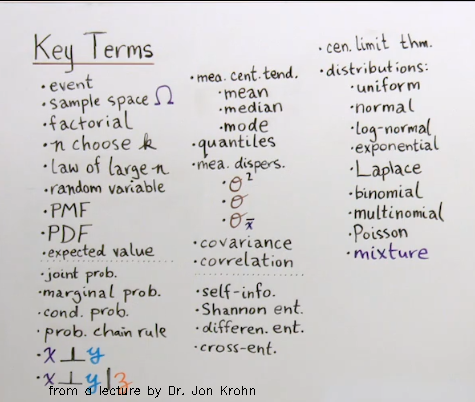

In [5]:
show_img("/content/here/MyDrive/Math works/prob key terms.png", source="from a lecture by Dr. Jon Krohn", source_scale=0.4)

In [7]:
np.random.seed(42)


# 7.2 Review of Essential Probability Theory


## Measures of Central Tendency

### Skewness

In [8]:
x = st.skewnorm.rvs(10, size=1000)
x[:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

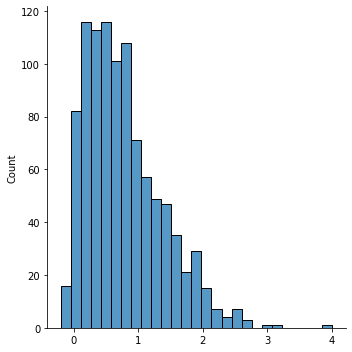

In [9]:
sb.displot(x)

### Mean

The most common measure of central tendency, synonomous with the term "average", is the mean, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$ 

In [10]:
x_bar = x.mean()    # np.mean(x)
x_bar

0.7719211854654121

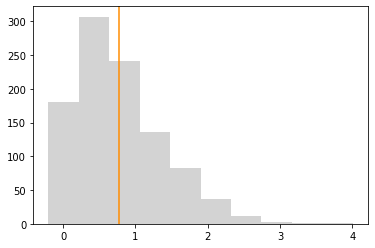

In [12]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='darkorange')
_ = plt.hist(x, color = 'lightgray')

### Mode
The **mode** is least impacted by skew, but is typically only applicable to **discrete distributions**. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

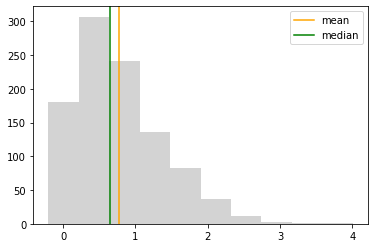

In [15]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange', label='mean')
plt.axvline(x = np.median(x), color='green', label='median')
_ = plt.hist(x, color = 'lightgray')
plt.legend()

## Measures of Dispersion

### Variance
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$


In [16]:
x.var()

0.35528419278021617

**Standard Deviation**

A straightforward derivative of variance is standard deviation (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: $$ \sigma = \sqrt{\sigma^2} $$



In [17]:
x.var()**(1/2)

0.5960572059628305

In [18]:
sigma = x.std()
print(sigma)
print(sigma == x.var()**(1/2))

0.5960572059628305
True


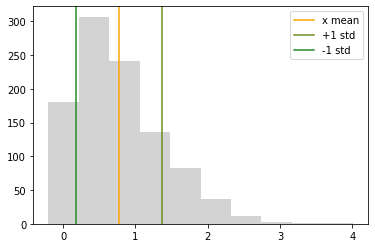

In [22]:
fig, ax = plt.subplots()
plt.axvline(x = x_bar, color='orange', label='x mean')
plt.axvline(x = x_bar+sigma, color='olivedrab', label='+1 std')
plt.axvline(x = x_bar-sigma, color='forestgreen', label='-1 std')
_ = plt.hist(x, color = 'lightgray')
plt.legend()

### Standard Error

A further derivation of standard deviation is standard error, which is denoted with $\sigma_\bar{x}$: $$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$



In [26]:
se1 = sigma/(x.size)**(1/2)

In [27]:
# sem = standard error of mean (mse)
se2 = st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

In [29]:
print(se1 == se2)

se3 = st.sem(x, ddof=0)
print(se3)

print(se1 == se3)

False
0.018848983865986414
True


Standard error enables us to compare whether the means of two distributions differ significantly, a focus of Intro to Stats.
- Are they really different? 
  - Are they two different phenomena?
- Or are the differences ignorable? 


### Gaussian distribution sampling

After Carl Friedrich Gauss. Also known as normal distribution:


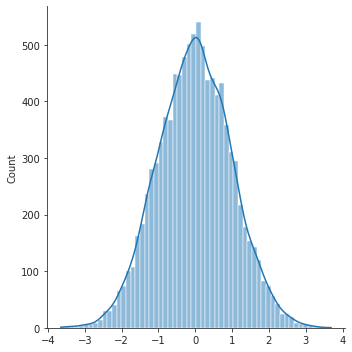

In [32]:
x = np.random.normal(size=10000)
sb.set_style('ticks')
_ = sb.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy normal() method...


In [33]:
x.mean(), x.std()

(-0.01191683889283601, 0.9927787593978571)

...it is a standard normal distribution (a.k.a., standard Gaussian distribution or **z-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

<br/>

Synonyms 
- = standard normal distribution
- = standard Gaussian distribution
- = z-distribution

<br/>

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called central limit theorem (covered next) is a critically important concept.



To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

### Skewed distribution random sampling


In [34]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-1.99862153,  1.299486  ,  0.376205  , -0.48068041, -1.23400012,
       -1.09164005,  0.42759632, -0.43247957, -1.18252002,  1.09838233])

In [35]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

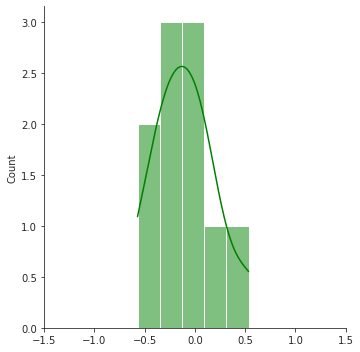

In [37]:
sb.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

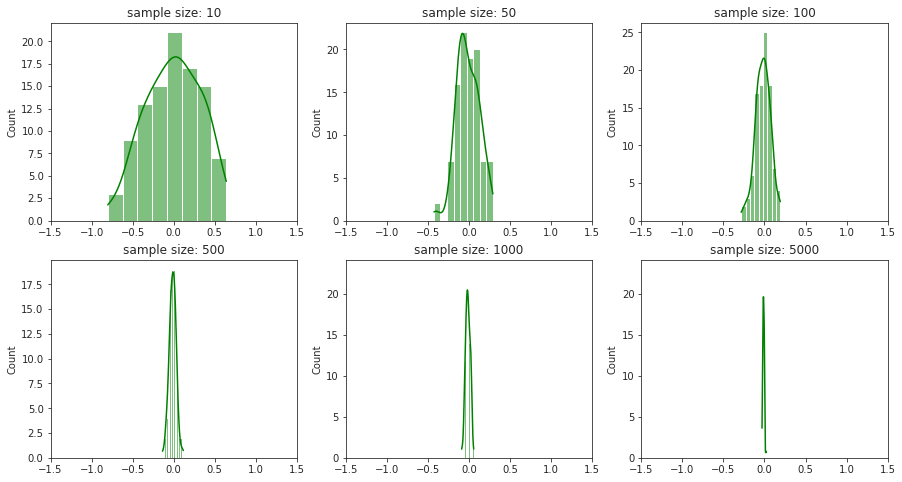

In [54]:
sample_size = [10, 50, 100, 500, 1000, 5000]

def plot_clt(dataset, xlim):
    fig, ax = plt.subplots(2, 3, figsize=(15, 8))
    idx = 0
    for i in range(2):
        for j in range(3):
            sb.histplot(sample_mean_calculator(dataset, sample_size[idx], 100), color='green', kde=True, ax=ax[i][j])
            ax[i][j].set_title(f"sample size: {sample_size[idx]}")
            ax[i][j].set_xlim(xlim[0], xlim[1])
            idx +=1
plot_clt(x, (-1.5, 1.5))

### Skewed distribution sampling

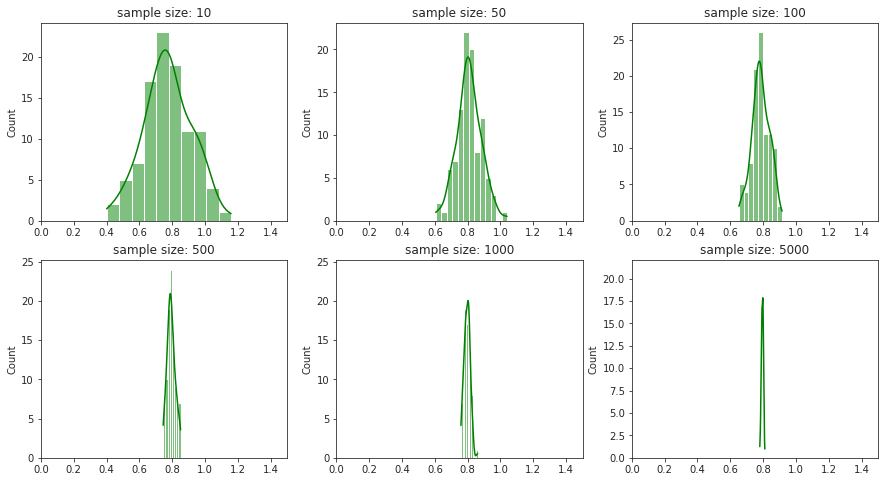

In [55]:
s = st.skewnorm.rvs(10, size=10000)
plot_clt(s, xlim=(0, 1.5))

### Muldimodal distribution sampling

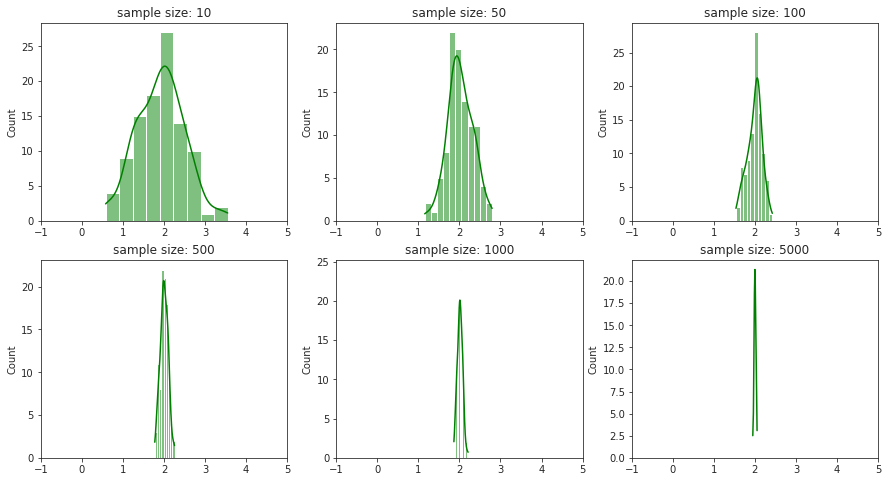

In [57]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
plot_clt(m, xlim=(-1, 5))

### Uniform distribution sampling

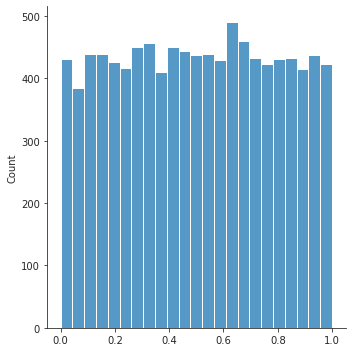

In [63]:
n = np.random.uniform(size=10000)
sb.displot(n)

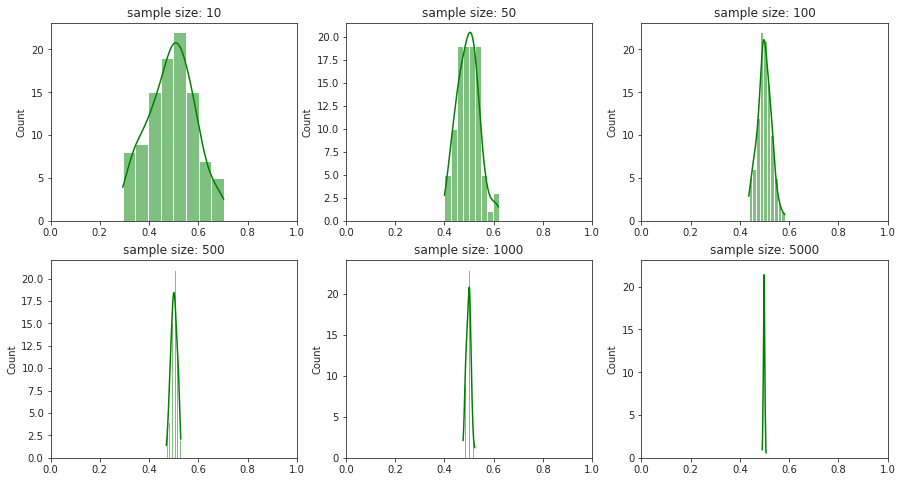

In [61]:
plot_clt(n, xlim=(0, 1))

# 7.3 z-scores and Outliers
Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: $$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula standardizes a given score $x_i$ to the (standard normal) z-distribution. (As we covered in Probability & Information Theory, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:



### Z-score: measure of spread

In [77]:
x_i = 85
mu = 60
sigma = 10

x = np.random.normal(mu, sigma, 10000)
x

array([57.42917643, 69.00328444, 47.16372435, ..., 47.54855036,
       65.6934993 , 57.87213749])

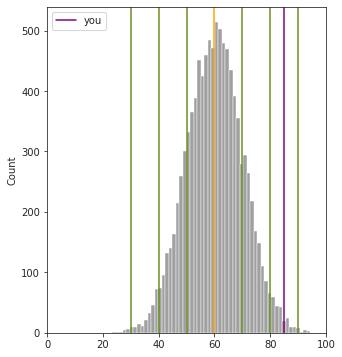

In [78]:
fig, ax = plt.subplots(figsize=(5, 6))

sb.histplot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu + v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple', label='you')
plt.legend()

In [72]:
z = (x_i - mu)/sigma
print(z)

z = (x_i - np.mean(x)) / np.std(x)
print(z)

2.5
2.528302243237725


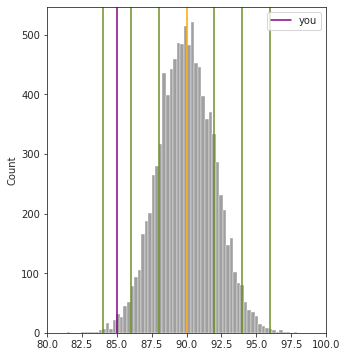

In [79]:
# Your z-score is 2.5 standard deviations below the mean (!):

mu = 90
sigma = 2

y = np.random.normal(mu, sigma, 10000)
fig, ax = plt.subplots(figsize=(5, 6))

sb.histplot(y, color='gray')
ax.set_xlim(80, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu + v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple', label='you')
plt.legend()

In [80]:
# threshold 85 stands at 9932th out of 10,000
len(np.where(y > 85)[0])

9932

In [81]:
## bottom 9932 makes up 99.32 percent.
100*9932/10000

99.32

In [82]:
# 1 percentile for distribution y stands at 85.25 ...!
np.percentile(y, 1)

85.25427311087475

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an outlier.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.


### Outlier
my tip you off on major issues including:
- your data collection methodology
- ML model

# 7.4 Exercises on z-scores


Exercises

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch?
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition?


### Exercise 1

Answer: ($x_i = \mu$)   
z = 0

In [ ]:
x_i = 100
mu = 100

### Exercise 2
Answer:   
z = 2 

In [102]:
x_i = 100
mu = 80
sigma = 10

dist = np.random.normal(mu, sigma, 100)
x_bar = dist.mean()

z = (x_i - x_bar)/sigma
z

1.9517774069170515

### Exercise 3
$x_i = 100+100 = 200$  
$= \frac{200-180}{5}$  
$= \frac{20}{5} = 4$

In [112]:
x_i = 100 + 100
x_bar = 180
sigma = 5

z3 = (x_i - x_bar)/sigma
z3

4.0

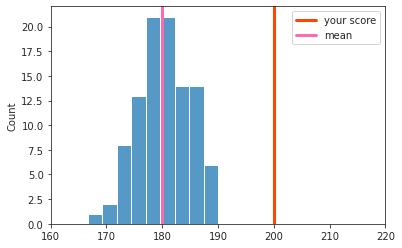

In [113]:
fig, ax = plt.subplots()
dist = np.random.normal(x_bar, sigma, 100)
sb.histplot(dist, ax=ax)
ax.axvline(x_i, color='orangered', linewidth=3, label='your score')
ax.axvline(x_bar, color='hotpink', linewidth=3, label='mean')
ax.set_xlim(160, 220)
ax.legend()

# 7.5 p-values

These quantify the probability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a z-score above 2.5 and only 67 (=10000-9993) attained a z-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: $$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's cumulative distribution function (CDF):


In [114]:
# cdf = cumulative distribution function
p_below = st.norm.cdf(-2.5) # pass in z-score
p_below

0.006209665325776132

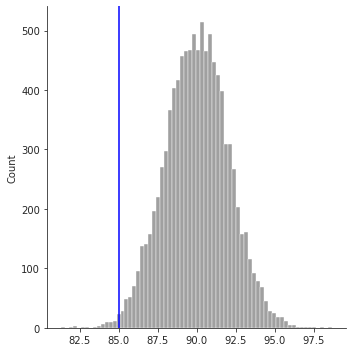

In [117]:
mu = 90
sigma = 2
y = np.random.normal(mu, sigma, 10000)

sb.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [118]:
st.norm.cdf(2.5)

0.9937903346742238

In [121]:
p_above = 1-st.norm.cdf(2.5)
p_above*10000

62.09665325776159

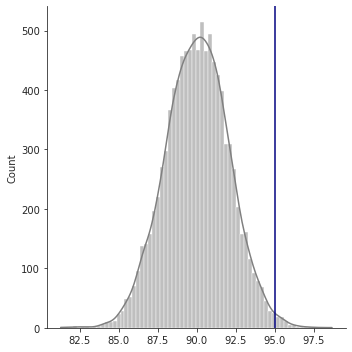

In [122]:
sb.displot(y, kde=True, color='gray')
plt.axvline(mu+2.5*sigma, color='navy')

In [123]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [124]:
p_outside * 10000

124.1933065155229

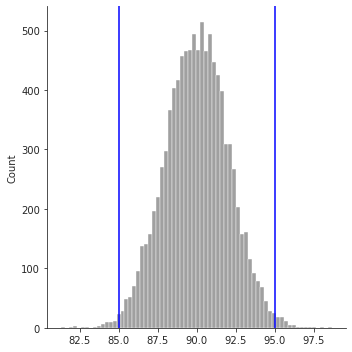

In [126]:
sb.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

Excerpt from 7.5 p-values

In other words, assuming a normal distribution, the probability (the p-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a p-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads or six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for either of six heads or six tails). Refer back to the coinflip_prob() method from the Probability notebook for proof.

If a friend of yours hands you a coin, the null hypothesis (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should reject the null hypothesis because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.




The z-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's percent point function (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

- z-score corresponding to $\alpha = .05$
- percent point function (PPF)
  - inverse of CDF
- To capture 95% of the values around the mean
  - leave 2.5% at the bottom of the distribution and 2.5% at the top

In [128]:
st.norm.ppf(.025) # returns z-score

-1.9599639845400545

In [129]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with z-score less than -1.96 or greater than 1.96 would be considered statistically significant.


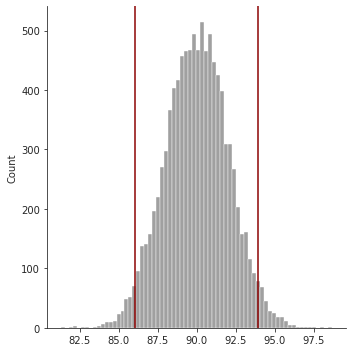

In [130]:
sb.displot(y, color='gray')
plt.axvline(mu + 1.96*sigma, color='darkred')
_ = plt.axvline(mu - 1.96*sigma, color='darkred')

- so if a data point is found below or above the significance threshold, we may consider the possibility that the data point may not belong to that distribution.
- So the p-value threshold and the data point location tips you off something about that point. 

# 7.6 Exercises on p-values

1. What are the p-values associated with your weightlifting results from the three preceding exercises?
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?


### Exercise 1 p-values for z-scores

In [148]:
x_i = 100
x_bar = 100

z1 = (x_i - x_bar)/sigma
print(z1)
p_value1 = st.norm.cdf(z1)
p_value1

0.0


0.5

In [149]:
x_i = 100
mu = 80
sigma = 10

z2 = (x_i - mu)/sigma
p_value2 = st.norm.cdf(z2)
p_value2

0.9772498680518208

In [150]:
x_i = 100 + 100
x_bar = 180
sigma = 5

z3 = (x_i - x_bar)/sigma
print(z3)
p_value3 = st.norm.cdf(z3)
p_value3

4.0


0.9999683287581669

In [145]:
st.norm.cdf(0.025)

0.509972518195238

In [151]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

Answer: 


1a. This result is at the mean, which is also the median for a normal distribution; exactly half of the values are above as they are below. This corresponds to the highest possible $p$-value, $p=1$, because any value in the distribution is guaranteed to be above it or below it:


In [146]:
def p_from_z(z):
    return 2 * st.norm.cdf(-abs(z))

In [147]:
p_from_z(0)

1.0

### Exercise 2 Statistical significance

In [138]:
st.norm.cdf(-0.025), st.norm.cdf(0.025)

(0.49002748180476197, 0.509972518195238)

In [157]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

In [156]:
p_above = 1 - st.norm.cdf(2)
p_above

0.02275013194817921

In [158]:
p_below + p_above

0.0455002638963584

In [159]:
p_from_z(2)

0.04550026389635839

In [160]:
p_from_z(4)

6.334248366623973e-05

(Incidentally, very small p values are often reported as negative log P values as these are much easier to read...)


In [155]:
p_value1, p_value2, p_value3

(0.5, 0.9772498680518208, 0.9999683287581669)

# Frequent Functions
- `sb.displot(x)`
- `plt.hist(x, color = 'lightgray')`

- `st.sem(x)`
- `x.mean()`
- `x.std()`
- `np.random.choice(dataset, size=sample_size, replace=False)`


- `st.norm.ppf(.025)`
  - pass in p-value, returns z-score
- `st.norm.cdf(-2.5)`
  - pass in z-score, returns p-value
- `len(np.where(y > 85)[0])`

References

My Statistics learning notebook following the live lesson series [**"Probability and Statistics for Machine Learning"**](https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/probability-and-statistics/9780137566273/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb